#### Generate the 2d PCA plots of the SOAP descriptors for ice phases and liquid water.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

folder='../results_classify'
before_denoiser=False  # change it to 'True' for PCA features after the denoising
if before_denoiser:
    state='before_denoiser'
    file_name=f'{state}_water_pca_cos_30'
else:
    state='after_denoiser'
    file_name=f'{state}_water_pca_cos_30'
  
feats_all=np.load(f'{folder}/feats_all_{file_name}.npy')
class_label=np.load(f'{folder}/labels_all_{file_name}.npy')
scaler=StandardScaler()
feats_all_scaled=scaler.fit_transform(feats_all)
pca=PCA(n_components=2)
data_pca = pca.fit_transform(feats_all_scaled)
data_pca.shape


(96734, 2)

In [3]:
import pandas as pd
df_label=pd.DataFrame(class_label)
df_label=df_label.rename(columns={0:'label'})

In [4]:
data_pca=pd.DataFrame(data_pca)
data_pca=data_pca.rename(columns={0:'pca_0',1:'pca_1'})
combined_df=pd.concat([df_label,data_pca],axis=1)
combined_df['label']=combined_df['label'].fillna('w')
combined_df

,label,pca_0,pca_1
0,2,-1.349989,-3.014450
1,2,-1.309072,-2.930236
2,2,-1.334684,-3.012512
3,2,-1.491846,-3.040371
4,2,-1.481056,-3.034717
...,...,...,...
96729,w,4.870931,-0.144377
96730,w,7.129118,7.045652
96731,w,6.735488,4.118170
96732,w,3.096001,0.552083


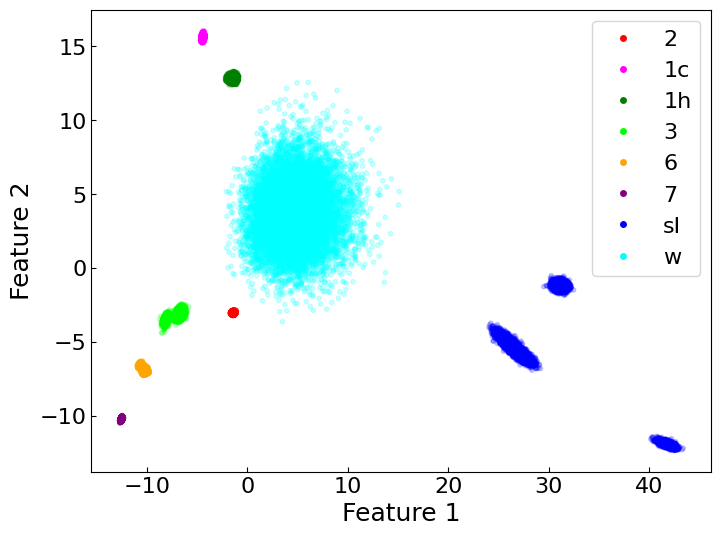

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
df=combined_df

categories=['2', '1c', '1h', '3', '6', '7', 'sI', 'w']
fixed_colors = ['red', 'magenta', 'green', 'lime', 'orange', 'purple', 'blue', 'cyan']
color_mapping = {category: fixed_colors[i % len(fixed_colors)] for i, category in enumerate(categories)}

fig,ax= plt.subplots(figsize=(8, 6))

scatter = ax.scatter(df['pca_0'], df['pca_1'],c=df['label'].map(color_mapping), label=df['label'],s=10,alpha=0.2)

#plt.title('PCA plot of features on unit cell')
ax.set_xlabel('Feature 1',fontsize=18)
ax.set_ylabel('Feature 2',fontsize=18)
ax.tick_params(axis='both', which='both', direction='in', labelsize=16)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[config_name], label=config_name)
        for config_name in categories]
# Add the legend
plt.legend(handles=handles, bbox_to_anchor=(1.0, 1.0), loc='upper right', fontsize=16)
# Adjust layout for better visibility
#plt.tight_layout()

# Show the plot
plt.savefig(f'feature_map_{state}.pdf',format='pdf',dpi=600,transparent=True)
#plt.show()